# Importing Libraries

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Feature Trasformation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from gensim.utils import simple_preprocess
from gensim import corpora

# Data Splitting
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

# Model Building 
from sklearn.pipeline import Pipeline

# Models
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Evaluation Metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score as asc

In [96]:
df = pd.read_csv('filteredRecords2.csv')
df.head()

,text,label
0,shall determine simple test answer advertiseme...,A
1,dazed astonishment The goose Mr Holmes The goo...,A
2,Plain Vanilla ASCII format used official versi...,A
3,sad tragedy followed The Coroner That court de...,A
4,listening ears Suddenly horror distinct sound ...,A


In [94]:
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)


<IPython.core.display.Javascript object>

NameError: name 'corpus' is not defined

# Bag OF Words

In [97]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df.text).toarray()
X.shape

(1000, 8101)

In [98]:
BOW_df = pd.DataFrame(X,columns = vectorizer.get_feature_names())
BOW_df.head()

,10th,12th,16th,17th,19th,1st,24th,26_s_,27th,3vi,...,young,younger,youngest,youngster,your,yours,youth,youthful,zambra,zeal
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


[Text(0.5, 1.0, 'CountVectorzer')]

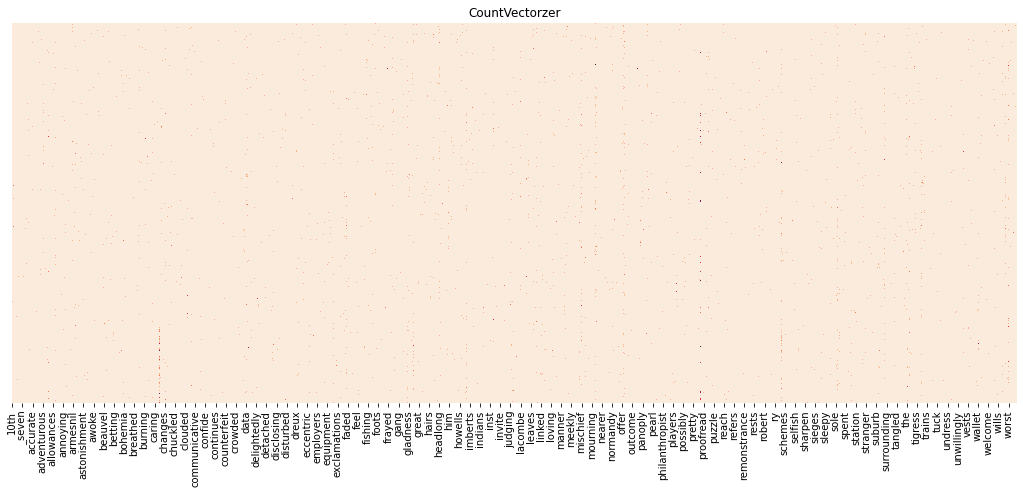

In [106]:
plt.figure(figsize=(18,7))
sns.heatmap(BOW_df, cbar =False,yticklabels = False, cmap = 'rocket_r').set(title='CountVectorzer')

# TF - IDF

In [100]:
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X).toarray()
X_tfidf.shape

(1000, 8101)

In [101]:
TFIDF_df = pd.DataFrame(X_tfidf, columns = vectorizer.get_feature_names())
TFIDF_df.head()

,10th,12th,16th,17th,19th,1st,24th,26_s_,27th,3vi,...,young,younger,youngest,youngster,your,yours,youth,youthful,zambra,zeal
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


[Text(0.5, 1.0, 'TF-IDF transform')]

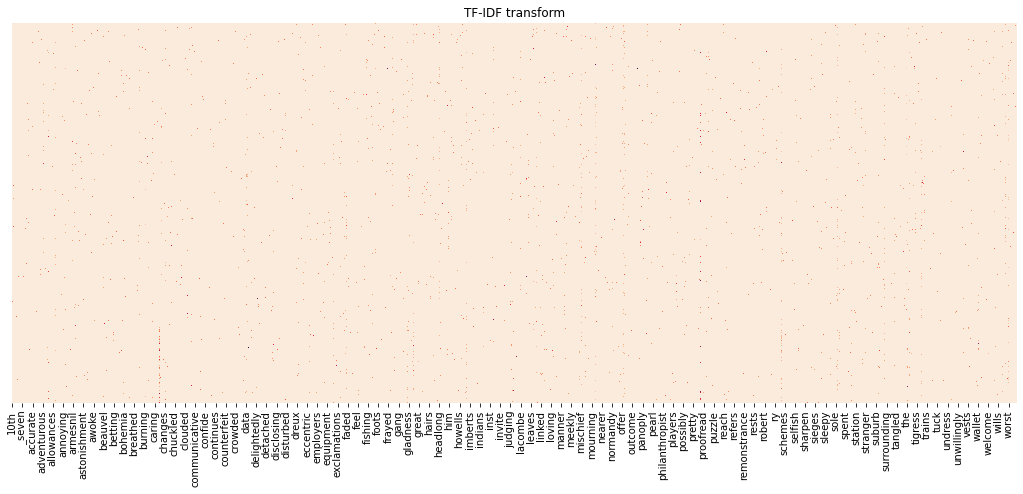

In [102]:
plt.figure(figsize=(18,7))
sns.heatmap(TFIDF_df, cbar =False,yticklabels = False, cmap = 'rocket_r').set(title='TF-IDF transform')

# N-Gram

# Creating function for Model training and Data Partitioning

In [103]:
def modelResults(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)
    
    #print('train',X_train.shape,'test', X_test.shape)

    algorithms = {
                'SVM' : SVC(random_state = 42),
                'DTR' : DecisionTreeClassifier(random_state = 42),
                'RFC' : RandomForestClassifier(random_state = 42),
                'KNN' : KNeighborsClassifier()
                }

    trainAcc, testAcc =[],[]

    for model_name, model  in algorithms.items():
        pipeline = Pipeline(steps = [('classifier',model)])

        model = pipeline.fit(X_train,y_train)

        trainPreds = model.predict(X_train)
        testPreds = model.predict(X_test)

        trainAcc.append(asc(y_train, trainPreds))
        testAcc.append(asc(y_test, testPreds))

    tab_dict = { 'train':trainAcc, 'test':testAcc}
    return pd.DataFrame(tab_dict, index = algorithms.keys())

# Classifying with BOW vector space

In [104]:
modelResults(BOW_df,df.label)

<IPython.core.display.Javascript object>

,train,test
SVM,0.99125,0.845
DTR,1.00000,0.785
RFC,1.00000,0.865
KNN,0.63250,0.445


Observation: SVM has fared better over others in terms of accuracy

# Classifying with TF-IDF vector space

In [105]:
modelResults(TFIDF_df, df.label)

<IPython.core.display.Javascript object>

,train,test
SVM,0.98875,0.870
DTR,1.00000,0.730
RFC,1.00000,0.875
KNN,0.92125,0.835


In [56]:
valacc, testacc = [], []
for step in range(0,9000,100):
    vectorizer = CountVectorizer(max_features = step)
    X = vectorizer.fit_transform(df.text).toarray()
    res = modelResults(X,df.label)
    res[res.model =='SVM'].test


,model,train,validation,test
0,SVM,0.984375,0.8125,0.75
1,DecisionTree,0.989062,0.7250,0.70
2,KNN,0.532813,0.3500,0.41


## Error Analysis

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(TFIDF_df, df.label, test_size=0.2, random_state = 42)
model.fit()

In [ ]:
# BOW_df['OUT_LBL'] = df.label
# TFIDF_df['OUT_LBL'] = df.label

# # define cv
# cv = KFold(n_splits = 10, random_state = 42, shuffle = True)